<a href="https://colab.research.google.com/github/RuslanMavlitov/IDE/blob/master/Practice_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [2]:
voice_data = pd.read_csv('/content/sample_data/voice_gender.zip')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


meanfreq — средняя частота голоса спикера (в кГц);

sd — стандартное отклонение частоты (в кГц);

median — медианная частота (в кГц);

Q25 — первый квартиль частоты (25-я квантиль) (в кГц);

Q75 — третий квартиль частоты (75-я квантиль) (в кГц);

IQR — межквартильный размах (Q75-Q25) (в кГц);

skew — асимметрия распределения частот;

kurt — эксцесс распределения частот;

sp.ent — спектральная энтропия;

sfm — спектральная равномерность;

ode — модальная частота (наиболее популярная частота голоса);

centroid — частотный центроид;

peakf — пиковая частота (частота с наибольшей энергией);

meanfun — среднее значение основной частоты, измеренной по акустическому сигналу;

minfun — минимальное значение основной частоты, измеренной по акустическому сигналу;

maxfun — максимальное значение основной частоты, измеренной по акустическому сигналу;

meandom — среднее значение доминирующей частоты, измеренной по акустическому сигналу;

mindom — минимальное значение доминирующей частоты, измеренной по акустическому сигналу;

maxdom — максимальное значение доминирующей частоты, измеренной по акустическому сигналу;

dfrange — диапазон доминирующей частоты, измеренный по акустическому сигналу;

modindx — индекс модуляции;

label — целевой признак — метка класса: male (голос принадлежит мужчине) или female (голос принадлежит женщине).

In [3]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Все признаки кроме целевой уже в численном формате

In [5]:
#проверим данные на наличие пропусков
voice_data.isnull().sum().sum()

0

In [18]:
voice_data['label'] = voice_data['label'].apply(lambda x: 1 if x=='male' else 0)
voice_data['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [19]:
y = voice_data['label']
X = voice_data.drop('label', axis=1)

In [21]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


##Задание 1.
Создайте модель дерева решений максимальной глубины 1. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа. 

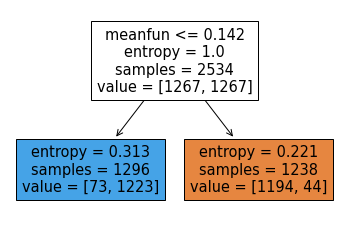

In [26]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt_1 = tree.DecisionTreeClassifier(
    max_depth=1, #глубина
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел
)
dt_1.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя

In [27]:
y_pred_1 = dt_1.predict(X_test)
print(f'значение метрики accuracy {metrics.accuracy_score(y_test, y_pred_1):.3f}')

значение метрики accuracy 0.956


##Задание 2
Увеличим глубину дерева.

Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

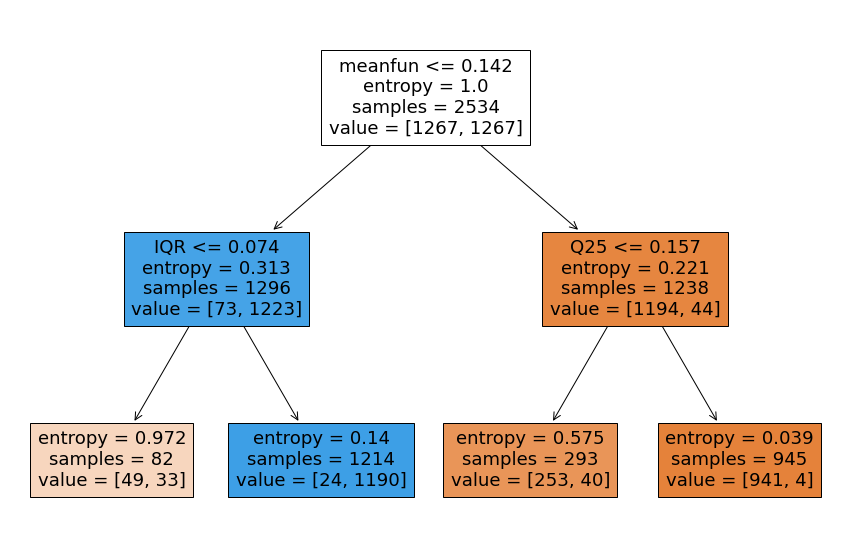

In [30]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt_2 = tree.DecisionTreeClassifier(
    max_depth=2, #глубина
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел
)
dt_2.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
fig, ax = plt.subplots(figsize=(15, 10))
ax = tree.plot_tree(
    decision_tree=dt_2, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя

In [31]:
y_pred_2 = dt_2.predict(X_test)
print(f'значение метрики accuracy {metrics.accuracy_score(y_test, y_pred_2):.3f}')

значение метрики accuracy 0.962


##Задание 3
Давайте дадим дереву решений полную свободу.

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

В качестве значения параметра random_state возьмите 0.

Обучите модель на тренировочной выборке.

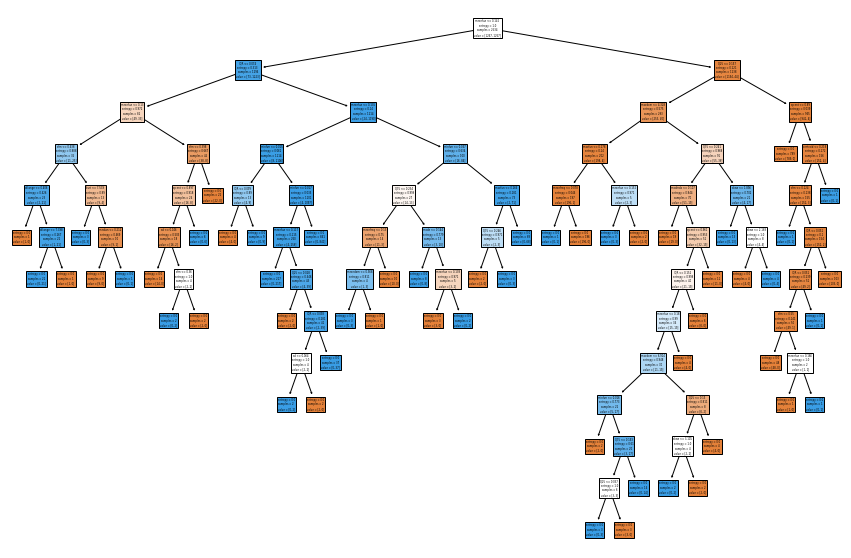

In [32]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt_3 = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt_3.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
fig, ax = plt.subplots(figsize=(15, 10))
ax = tree.plot_tree(
    decision_tree=dt_3, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

In [37]:
#Чему равна глубина полученного дерева решения? 
print(f'глубина полученного дерева = {dt_3.get_depth()}')

глубина полученного дерева = 12


In [38]:
#Чему равно количество листьев в полученном дереве решений?
print(f'количество листьев в полученном дереве = {dt_3.get_n_leaves()}')

количество листьев в полученном дереве = 54


Сделайте предсказание для обучающей и тестовой выборок и рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.

In [39]:
y_pred_train = dt_3.predict(X_train)
y_pred_test = dt_3.predict(X_test)
print(f'значение метрики accuracy на обучающейся выборке {metrics.accuracy_score(y_train, y_pred_train):.3f}')
print('-'*15)
print(f'значение метрики accuracy на тестовой выборке {metrics.accuracy_score(y_test, y_pred_test):.3f}')

значение метрики accuracy на обучающейся выборке 1.000
---------------
значение метрики accuracy на тестовой выборке 0.973


#Задание 4
Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (Grid SearchCV).

In [40]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

In [41]:
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

С помощью Grid SearchCV из модуля model_selection библиотеки sklearn переберите гиперпараметры дерева решений из приведённой сетки на обучающей выборке и найдите оптимальные. Параметр random_state для дерева решений установите равным 0. В качестве метрики качества (параметр scoring) используйте accuracy.

In [42]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid_search = GridSearchCV(
    estimator= tree.DecisionTreeClassifier(random_state=0), 
    param_grid=param_grid, 
    cv=cv,
    scoring = 'accuracy', 
    n_jobs = -1    
)  
%time grid_search.fit(X_train, y_train) 

print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))
print('-'*15)
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)
print(f'значение метрики accuracy на обучающейся выборке {metrics.accuracy_score(y_train, y_pred_train):.3f}')
print('-'*15)
print(f'значение метрики accuracy на тестовой выборке {metrics.accuracy_score(y_test, y_pred_test):.3f}')

CPU times: user 762 ms, sys: 36.4 ms, total: 798 ms
Wall time: 7.97 s
Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}
---------------
значение метрики accuracy на обучающейся выборке 0.996
---------------
значение метрики accuracy на тестовой выборке 0.970


#Задание 5
Для оптимального дерева решений, построенного в задании 7.4, найдите важность каждого из факторов. Визуализируйте её в виде столбчатой диаграммы.

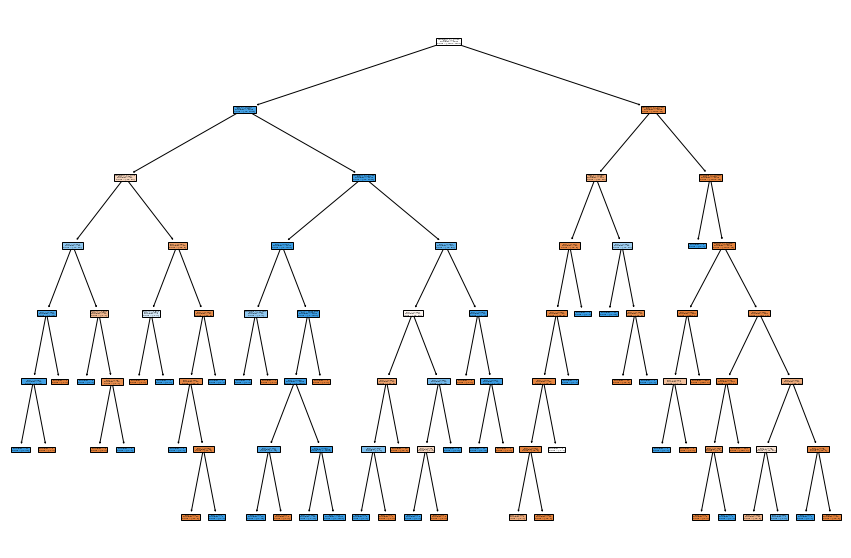

In [47]:
# Инициализируем модель дерева решений с 'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3 и обучаем ее
dt_best = tree.DecisionTreeClassifier(
    criterion='gini', #критерий информативности
    max_depth=7, #глубина дерева
    min_samples_split=3, #минимальное количество объектов в листе
    random_state=42 #генератор случайных чисел
)
dt_best.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
fig, ax = plt.subplots(figsize=(15, 10))
ax = tree.plot_tree(
    decision_tree=dt_best, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

In [101]:
df = pd.DataFrame({'feature_name' : X.columns, 'feature_importance_in_%' : dt_best.feature_importances_*100})
df = df.sort_values(by='feature_importance_in_%', ascending=False, ignore_index=True)

In [102]:
df

,feature_name,feature_importance_in_%
0,meanfun,86.119971
1,IQR,5.681024
2,sfm,1.653676
3,minfun,1.558443
4,kurt,0.813388
5,centroid,0.742464
6,dfrange,0.550022
7,skew,0.517752
8,sd,0.493009
9,mode,0.413616


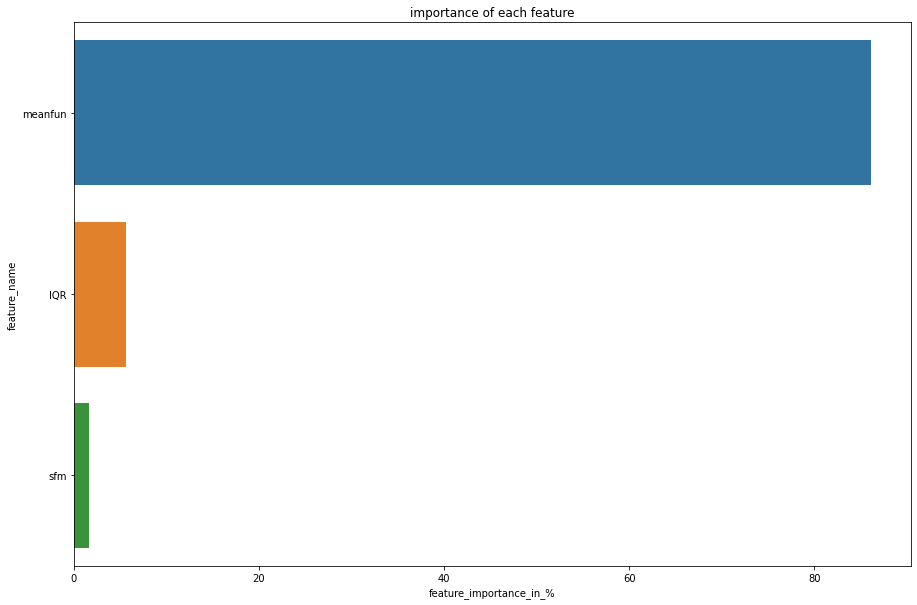

In [104]:
fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.barplot(data=df.loc[0:2], y='feature_name', x='feature_importance_in_%')
ax.set_title('importance of each feature');